## Singular Value Decomposition (SVD)

### Theory

SVD (singular value decomposition) can be thought as a tool for:

* Data reduction.
* Data driven generalization of fourier transformation (FFT)

SVD decompose matrix $\mathbf{X}$ into 3 matrices $\mathbf{X = U \Sigma V^T} \\$ 
* Here, U and V are unitary matrices (each column is orthonormal) i.e. $\mathbf{U U^T = U^T U = I}$ and $\mathbf{V V^T = V^T V = I}\\$
* $\mathbf{\Sigma}$ is diagonal and $\sigma_1 \ge \sigma_2 \ge \sigma_3 .....\ge \sigma_m \ge 0$
* $\mathbf{U}$ and $\mathbf{V}$ can be thought as roations and $\Sigma$ as a stretch
* The columns of matrix $\mathbf{U}$ are eign-faces in the order of importnace 
* The columns of matrix $\mathbf{V^T}$ show how the eign-faces are combined to form the correposnding columns in the matrix $\mathbf{X}$

It can also shows that: $X = \sigma_1 u_1 v_1^T + \sigma_2 u_2 v_2^T + ...+ \sigma_m u_m v_m^T \\$
The above can be truncated to approximate, $X \approx \tilde{U} \tilde{\Sigma} \tilde{V^T} = \tilde{X}$, where tilde's are the truncted matrices. 
From the Eckart Young Thm it can be shown that, $||X - \tilde{X}||_F = \tilde{U} \tilde{\Sigma} \tilde{V^T}\\$
Note that $\tilde{U}^T \tilde{U} = I$, but $\tilde{U} \tilde{U}^T \neq I$

SVD and correlations
* column wise correlation matrix of $\mathbf{X}$ can be written as: $\mathbf{X^T X} = \begin{bmatrix}
                                                                                        x_1^T x_1 & x_1^T x_2 & .. &x_1^T x_m\\
                                                                                        x_2^T x_1 & x_2^T x_2 & .. &x_2^T x_m\\
                                                                                        .. & ..  & .. & ..\\
                                                                                        x_m^T x_1 & x_m^T x_2 & .. &x_m^T x_m\\
                                                                                        \end{bmatrix}$
* elements of the correlation matrix are the inner product of the columns (or eign faces) of matrix $\mathbf{X}, x_i x_j^T = <x_i,x_j> \\$
i.e. if two faces are similar the inner product will be larger (larger correlations)

* It can be shown that: $X^T X V = \Sigma^2 V $, i.e. v s are eign-vectors of column space correlation matrix of $X$

* similarly, it can shows that: $X X^T U = \Sigma^2 U $
  

Here, $\mathbf{U}$ and $\mathbf{V}$ are unitary metrices: 
* $\mathbf{U U^T = U^T U = I}$, when $\mathbf{U}$ is not square only $\mathbf{U^TU = I}$ true 
* $\mathbf{V V^T = V^T V = I}$, when $\mathbf{V}$ is not square only $\mathbf{V^TV = I}$ true

Unitary matrices preserves the angle between the vectors and their lengths, they just rotate the vectors:
* $\mathbf{<x,y> = <Ux,Uy>}$ for $x,y \epsilon R^n$

#### Example 01: Image compression using SVD 

* $\mathbf{X = U_r \Sigma_r V_r^T}$, here we are keeping only few eign values(upto order r)
* $U_{n \times r}, \Sigma_{r \times r}, V_{r \times m}$

In [1]:
import numpy as np
import os 
import matplotlib.pyplot as plt 
from  matplotlib.image import imread

(-0.5, 1499.5, 1999.5, -0.5)

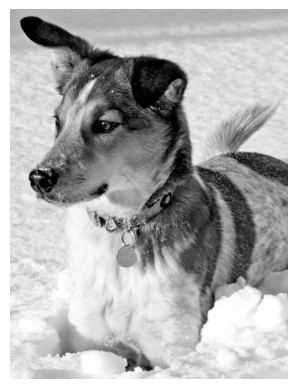

In [2]:
# read the image and convert to gray scale 
dog_image_path = os.path.join('DATA','dog.jpg')
A = imread(dog_image_path)   # image of the dog (3 color chanels) 
X = np.average(A,-1)         # convert into gray scale (1 color chanels) 

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')

In [3]:
# SVD of the image 
U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)

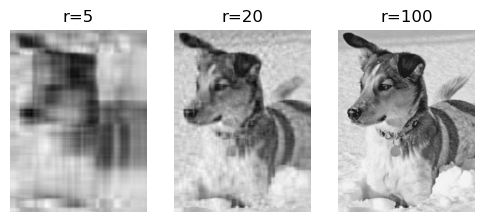

In [4]:
# try to  reconstruct the image using few eign values (or using a few eign faces)
plt.rcParams['figure.figsize'] = [6,18]
i=0
for r in (5,20,100):
    X_approx =  U[:,:r] @ S[:r,:r] @ VT[:r,:]
    plt.subplot(1,3,i+1)
    plt.imshow(X_approx).set_cmap('gray')
    plt.axis('off')
    plt.title(f'r={r}')
    i+=1


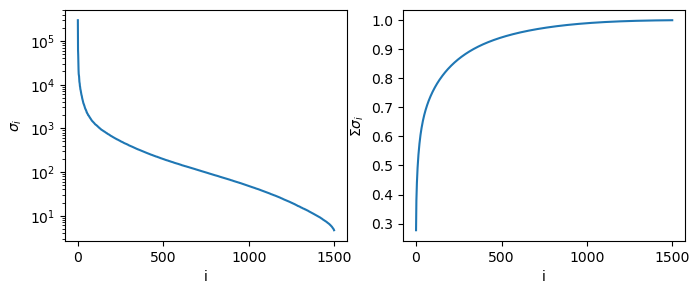

In [5]:
# ploting the singular values 
plt.rcParams['figure.figsize'] = [8,3]
x_axis = np.arange(0,S.shape[0])
plt.subplot(1,2,1)
plt.semilogy(x_axis,np.diag(S))
plt.xlabel('i')
plt.ylabel('$\sigma_i$')
# plot cumulative sum
plt.subplot(1,2,2)
plt.plot(x_axis,np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.xlabel('i')
plt.ylabel('$\Sigma \sigma_i$')
plt.show()


 ### Psudo-inverse (Moore penrose psudo inverse)

* We want to solve for $Ax=b$ linear system of equations ( given A and b we want to solve for x) 
* SVD allows us to solve for non-square matrix A 
* $Ax=b \Rightarrow \tilde{x} = A^{\dagger} b$, where $A^{\dagger} = V \Sigma^{-1} U^{-1}$ is known as moore penrose psudo-inverse

Case A: Underdetermined, $n<m$ (short fat A)
* There are infinitly many solustions (in general) for x gievn A and b
* psudo-inverse solution gives, min $||\tilde{x}||_2$ s.t. $A\tilde{x}=b$ (minimum norm solution)

Case B: Overdetermined, $n>m$ (tall skinny A)
* Zero solution for x given A and b 
* SVD gives the least square solution, $min||A\tilde{x}-b||_2$
* least square linear regression is sensitive to the outliers (i.e.It doesn't work properly for the data data with outliers )

Consider, $A\tilde{x} = \hat{U} \hat{\Sigma} V^T V \hat{\Sigma}^{-1} \hat{U^T} b = \hat{U} \hat{U^T} b$, (projects b into span of $\hat{U} $ = span(A))
* $col(A) = col(\hat{U})$ [range of A ], solution to $Ax =b$ only exists if b is in column space of A
* $ker(A^T)$ [orthogonal complement(things that are not in the column space of A)]
* $row(A) = row(V^T) = col(V)$
* $ker(A)$ [a.k.a null space], set of all vectors $x_{null}$, st. $Ax_{null}=0$, this implies $A(x + x_{null}) = b \Rightarrow x + x_{null} \\$ is also a solution, this implies that, $dim(ker(A)) \neq 0$ then there are infinitely many solutions

### Example 2: SVD linear regression

* $Ax=b \Rightarrow \tilde{x} = A^{\dagger} b$ (using p-inverse)
* $A = U \Sigma V^T \Rightarrow \tilde{x} = V \Sigma^{-1} U^T b$ (using SVD)

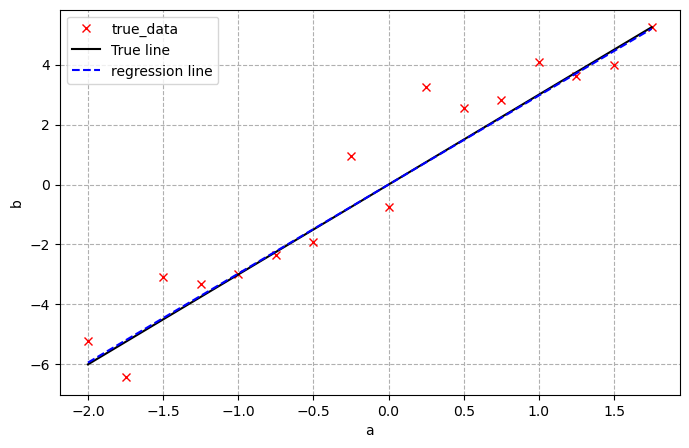

In [6]:
x = 3 # true slope 
a = np.arange(-2,2,0.25).reshape(-1,1)
b = a*x + np.random.randn(*a.shape)

plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams.update({'font.size': 10})

plt.plot(a,b,'x',color='r',linewidth= 2,label='true_data')
plt.plot(a,a*x,color='k',label='True line')

U,S,VT = np.linalg.svd(a,full_matrices=False)
x_tilde = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b
plt.plot(a,a*x_tilde,'--',color='b',label='regression line')

plt.xlabel('a')
plt.ylabel('b')
plt.grid(linestyle='--')
plt.legend()
plt.show()

Note that in the aove example:
* $U = a/||a||_2$ and $\Sigma = ||a||_2$ and $V=I$


In [7]:
# two ways of finding x_tilde (or the slope)

x_tilde_1 = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b 
print(f'from the SVD the predicted slope = {x_tilde_1}')
x_tilde_2 = np.linalg.pinv(a) @ b
print(f'from p-inverse the predicted slope = {x_tilde_1}')

from the SVD the predicted slope = [[2.97033506]]
from p-inverse the predicted slope = [[2.97033506]]


### Multivariable regression 


* along the rows different examples (n samples) 
* along the columns different attributes(m attributes)

$ A = \begin{bmatrix}
a^{(1)}_1 & a^{(1)}_2 & .. &a^{(1)}_m\\
a^{(2)}_1 & a^{(2)}_2 & .. &a^{(2)}_m\\
.. & ..  & .. & ..\\
a^{(n)}_1 & a^{(n)}_2 & .. &a^{(n)}_m\\
\end{bmatrix}$

$ x = \begin{bmatrix}
x_1 \\
x_2 \\
.. \\
x_m\\
\end{bmatrix}$

$ b = \begin{bmatrix}
b_1 \\
b_2 \\
.. \\
b_n\\
\end{bmatrix}$


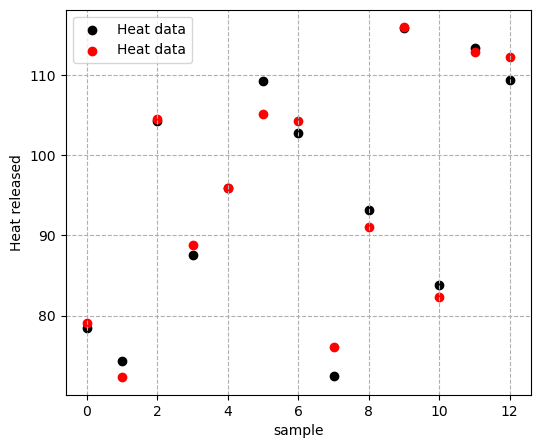

In [8]:
# heat generated from cement.
# load data

plt.rcParams['figure.figsize'] = [6, 5]
plt.rcParams.update({'font.size': 10}) 

A  = np.loadtxt(os.path.join('DATA','hald_ingredients.csv'),delimiter=',')
b  = np.loadtxt(os.path.join('DATA','hald_heat.csv'),delimiter=',')

# solve Ax = b using SVD 
U, S, VT = np.linalg.svd(A,full_matrices=False)
x_tilde = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b # or x_tilde = np.linalg.pinv(X) @ b

#plt.plot(b,'-o',color='k',linewidth= 0.5,label='Heat data')
plt.scatter(np.arange(13),b,color='k',label='Heat data')
#plt.plot(A @ x_tilde,'-o',color='r',linewidth= 0.5,label='Regression')
plt.scatter(np.arange(13),A @ x_tilde,color='r',label='Heat data')
plt.xlabel('sample')
plt.ylabel('Heat released')
plt.grid(linestyle='--')
plt.legend()
plt.show()

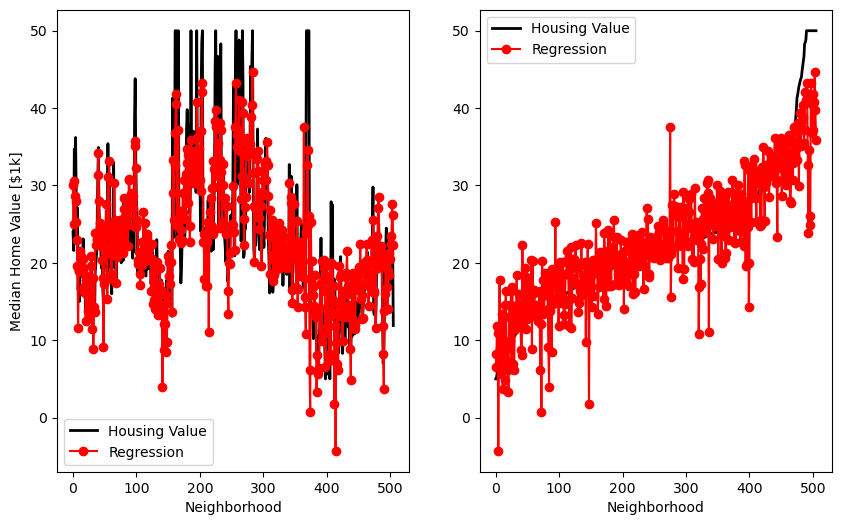

In [9]:
# Boston housing values 
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams.update({'font.size': 10})
# load data 
H = np.loadtxt(os.path.join('DATA', 'housing.data'))
b = H[:,-1]  # housing values 
A = H[:, :-1] # other features 
A = np.pad(A,((0,0),(1,0)),mode='constant',constant_values=1) # pad a columns of ones for intercept
# for numpy.pad fucntion refer https://sparrow.dev/numpy-pad/

# solve Ax = b using SVD 
U, S, VT = np.linalg.svd(A,full_matrices=False)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

#plot
fig = plt.figure()
ax1 = fig.add_subplot(121)
plt.plot(b, color='k', linewidth=2, label='Housing Value') # True relationship
plt.plot(A@x, '-o', color='r', linewidth=1.5, markersize=6, label='Regression')
plt.xlabel('Neighborhood')
plt.ylabel('Median Home Value [$1k]')
plt.legend()

ax2 = fig.add_subplot(122)
sort_ind = np.argsort(H[:,-1]) # sorting according to housing values
plt.plot(b[sort_ind], color='k', linewidth=2, label='Housing Value') # True relationship
plt.plot(A[sort_ind,:]@x, '-o', color='r', linewidth=1.5, markersize=6, label='Regression')
plt.xlabel('Neighborhood')
plt.legend()

plt.show()

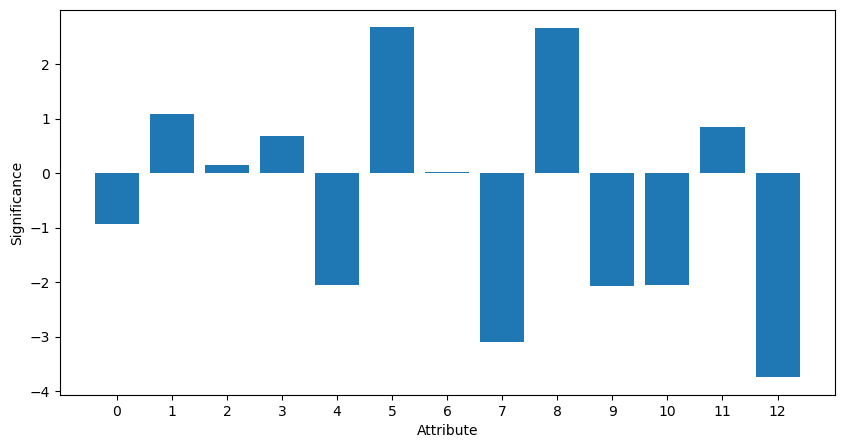

In [10]:
# ploting the significance of each attribute to the housing price 
# refer broadcasting rules: https://numpy.org/doc/stable/user/basics.broadcasting.html

plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams.update({'font.size': 10})
H = np.loadtxt(os.path.join('DATA', 'housing.data'))
b = H[:,-1]  # housing values 
A = H[:, :-1] # other features 
A_mean = np.mean(A,axis=0).reshape(-1,1) # mean of the columns (or features)
A_mean = A -  A_mean.T                   # mean centered data columns 
A_mean = A_mean/np.std(A_mean, axis=0).reshape(1,-1) # normalized by std 
#A_mean = np.pad(A_mean,((0,0),(1,0)),mode='constant',constant_values=1) # pad 1 to first column

# SVD 
U, S, VT = np.linalg.svd(A_mean,full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

# plot 
x_tick = np.arange(len(x))
plt.bar(x_tick,x)
plt.xlabel('Attribute')
plt.ylabel('Significance')
plt.xticks(x_tick)
plt.show()

### More notes about SVD 


* SVD works only when the data is aligned. In the eign face example ( each column of X matrix is a face), the row space should represent the same thing across each column.

* This means the data need to be aligned such that the row space represent the same thing. Ex. The pixels correspnding to eye on one image should be same as the pixels representing the eyes on all the other images

### Randomized SVD: 

* If X is a large matrix and assume that there is low rank(r) to it, then using randomized SVD one can get massive reduction in the computation of the SVD of matrix
* This is achived by randomly sampling the column space of matrix X using random projection matrix $P \epsilon R^{m \times r}:\\$
$Z = XP$
* Then do $QR$ factorization of matrix $Z \\$
$Z = Q R $, where $Q$ is orthonormal basis for $Z$ (and most of the time $Q$ also represent the orthonormal basis of $X$)
* Next project the $X$ into $Q : \\$
$Y = Q^T X$ and find the SVD of $Y = U_Y \Sigma V^T$, note that here $\Sigma$ and $V^T$ are same as that of $X$

* Finally get back to the orthonormal basis of X (which is mostly same as that of Z): $U_X = Q U_Y$

* There are two things that can improve the randomized SVD 
1.  over sampling: add some extre columns to random matrix $P \epsilon R^{m \times (r + p)}$, where $p $ is the added extra columns

2. power iterations: this is useful when the singular values doen't decay faster. The decay of singular values can make faster by pass $X$ matrix throgh $(X X^T)\\$
i.e. $(X X^T)^q X$, where $q = 1,2,3,4,5$ (this is very expensive operation when X is large)

In [11]:
plt.rcParams['figure.figsize'] = [16,6]
# this fucntion find the randomized SVD (as opposed to SVD)
def rSVD(X,r,p,q):
    m,n = X.shape
    P = np.random.randn(n,r)
    Z = X @ P              # random projection of col. of X 
    for i in range(q):     # power iteration 
        Z = X @ (X.T @ Z )
    Q, R = np.linalg.qr(Z,mode='reduced')
    Y = Q.T @ X 
    UY, S, VT = np.linalg.svd(Y,full_matrices=False)
    U = Q @ UY 

    return U, S, VT 

In [12]:
from matplotlib.image import imread
A = imread(os.path.join('DATA', 'jupiter.jpg')) # read the image and convert to np.array 
X = np.mean(A,axis=2)

In [13]:
# compute SVD 
U,S,VT = np.linalg.svd(X,full_matrices=False)

In [14]:
# get the rSVD values 
r = 400 # target rank 
q = 1   # no of powwer iterations 
p = 5   # oversampling paramter (how many extra columns add)

# randomized SVD (note that this is fast comoutation)
rU, rS, rVT = rSVD(X,r,p,q)

In [15]:
# svd approximation 
XSVD = U[:,:(r+1)] @ np.diag(S[:(r+1)]) @ VT[:(r+1),:] 

# randomized SVD approximation 
rSVDX = rU[:,:(r+1)] @ np.diag(rS[:(r+1)]) @ rVT[:(r+1),:]

Text(0.5, 1.0, 'from randomized SVD')

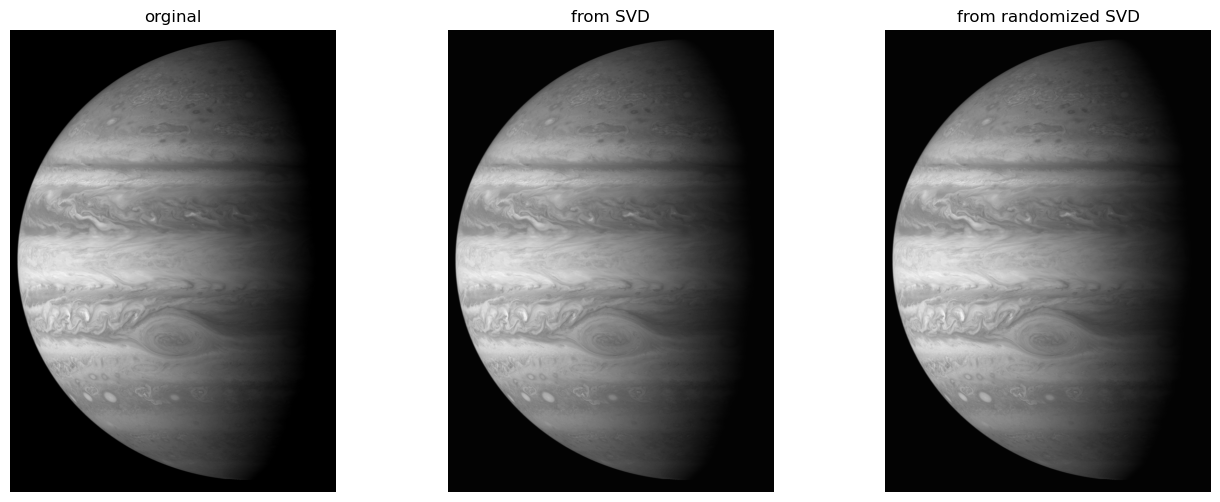

In [16]:
# plot 
fig, axs = plt.subplots(1,3)
plt.set_cmap('gray')
axs[0].imshow(X)
axs[0].axis('off')
axs[0].set_title('orginal')

axs[1].imshow(XSVD)
axs[1].axis('off')
axs[1].set_title('from SVD')

axs[2].imshow(rSVDX)
axs[2].axis('off')
axs[2].set_title('from randomized SVD')